In [1]:
from S2reader import SentinelProductReader
import os , re , time , zipfile


BAND_RES = {"B01":60,"B02":10,"B03":10,"B04":10,"B05":20,"B06":20,"B07":20,"B08":10,"B8A":20,"B09":60,"B11":20,"B12":20}
BANDS = ["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B11","B12"]
zip_dir = '../sen2'
zip_files = [f for f in os.listdir(zip_dir) if f.lower().endswith(".zip")]
for i in range(len(zip_files)):
    zip_files[i] = os.path.join(zip_dir , zip_files[i])


In [22]:
for i in range(len(zip_files)):
    rdr = SentinelProductReader(zip_files[i])

    # 1) Read one band at native resolution
    arr, profile = rdr.read_band("B04")

    # 2) Build valid mask (True=valid) using SCL codes as invalid
    mask, mask_profile = rdr.build_valid_mask(invalid_scl_codes=[0,1,3,8,9,10], target_resolution=20, resampling="nearest")

    # 3) Stack bands to a common grid
    stack, stack_profile = rdr.stack_bands(
        bands=["B04","B03","B02"],
        band_res=BAND_RES,
        align_to="min",         # or "max", or 10/20/60
        resampling="bilinear"
    )

In [23]:
import numpy as np
len(np.where(mask == False)[0])

4859928

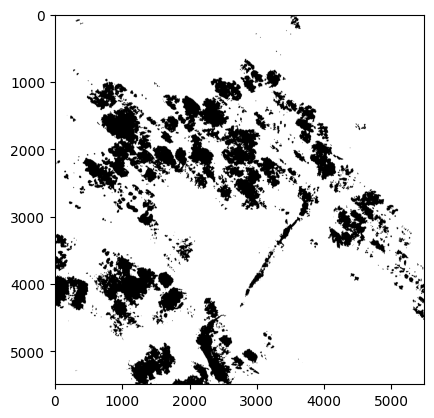

In [24]:
import matplotlib.pyplot as plt
plt.imshow(mask , cmap='gray')
plt.show()

alignment for esri

In [1]:
from S2reader import SentinelProductReader
rdr = SentinelProductReader("../../sen2/S2A_MSIL2A_20250629T071321_N0511_R106_T39RXM_20250629T103017.SAFE.zip")

# خروجی GeoTIFF هم‌راستا با ESRI (UTM → 3857 → 4326)، با nearest در هر دو مرحله
profile_out = rdr.export_esri_aligned_tif(
    band="B04",
    out_tif="B04_esri_aligned.tif",
    resolution=10  # اختیاری؛ در صورت عدم تعیین، بهترین رزولوشن موجود آن باند برداشته می‌شود
)


In [ ]:
profile_out

{'driver': 'GTiff',
 'height': 10418,
 'width': 11785,
 'count': 1,
 'dtype': 'uint16',
 'crs': CRS.from_epsg(4326),
 'transform': Affine(9.634797429974401e-05, 0.0, 52.0164065605354,
        0.0, -9.634797429974401e-05, 28.924374104688276),
 'compress': 'deflate',
 'predictor': 1,
 'nodata': None}

RGB version of tif for esri alignment

In [1]:
from S2reader import SentinelProductReader
rdr = SentinelProductReader("../../sen2/S2A_MSIL2A_20250629T071321_N0511_R106_T39RXM_20250629T103017.SAFE.zip")

# خروجی GeoTIFF هم‌راستا با ESRI (UTM → 3857 → 4326)، با nearest در هر دو مرحله
profile_out = rdr.export_esri_aligned_rgba_tif(
    out_tif="S2_RGB_ESRI_aligned_10m.tif",
    resolution=10  # اختیاری؛ در صورت عدم تعیین، بهترین رزولوشن موجود آن باند برداشته می‌شود
)

g:\Remote_sensing_Project\ESRGAN-project\Library\S2reader.py:854: RuntimeWarning: invalid value encountered in cast
  r8 = (stretch_band(data_4326[0]) * 255.0).round().astype(np.uint8); r8[~valid] = 0
g:\Remote_sensing_Project\ESRGAN-project\Library\S2reader.py:855: RuntimeWarning: invalid value encountered in cast
  g8 = (stretch_band(data_4326[1]) * 255.0).round().astype(np.uint8); g8[~valid] = 0
g:\Remote_sensing_Project\ESRGAN-project\Library\S2reader.py:856: RuntimeWarning: invalid value encountered in cast
  b8 = (stretch_band(data_4326[2]) * 255.0).round().astype(np.uint8); b8[~valid] = 0


check on output file

In [2]:
import rasterio
with rasterio.open("S2_RGB_ESRI_aligned_10m.tif") as ds:
    print("Bands:", ds.count)         # should be 4
    print("CRS:", ds.crs)             # should be EPSG:4326
    print("Dtype:", ds.dtypes)        # should be ('uint8', 'uint8', 'uint8', 'uint8')
    print("Size:", ds.width, ds.height)


Bands: 4
CRS: EPSG:4326
Dtype: ('uint8', 'uint8', 'uint8', 'uint8')
Size: 11785 10418


check for esri

In [ ]:
SentinelProductReader.export_rgba_grid_3x3_from_zip(zip_files[0] , './')